<h2> IMDB dataset을 이용한 CNN 모델(컨볼루션 신경망)</h2>

<h3> 0. 기본 소개</h3>

<h3>DataSet: IMDB</h3>


IMDB는 Internet Movie DataBase을 뜻하며 영화에 대한 리뷰 데이터, 총 5만개의 리뷰로 이루어져 있고 훈련 데이터와 검증데이터를 각각 25000개씩 각각 50대50의 긍정리뷰와 부정리뷰를 가지고 있다.
  
 <h3> CNN (Conventional Neural Networks)</h3>
 
일반신경망과 비슷한 구조를 가지고 있지만,  입력데이터가 이미지라는 가정하에 수행되므로, 이미지 데이터를 인코딩할 수 있다. ConvNet의 각 레이어는 미분가능한 변환함수를 통해 하나의 Activation Volume을 또다른 Activation Volume으로 변환 시켜준다. 크게 Convolution layer, Pooling layer, Fully-Connected layer -> <b>3개의 레이어가 사용된다.</b>

픽셀값으로 이루어진 원본이미지를 각 레이어를 거치며 클래스 점수로 변환한다.
또, 항상 레이어가 parameter를 가지고 있는 것이 아니다. 어떤 레이어는 parameter들을 가지고 있지만, 또 어떤 레이어는 parameter 값을 가지고 있지 않는 경우가 존재하기 때문이다.

In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D

Using TensorFlow backend.


<h3> -> 사용할 패키지 불러오기</h3>

In [0]:
max_features = 20000
text_max_words = 200

In [9]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

17465344/17464789 [==============================] - 1s 0us/step


<h2>1. 데이터셋 생성하기 </h2>

<h3>-> 훈련셋과 시험셋 불러오기 </h3>
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

<h3> 훈련셋과 검증셋 분리 </h3>

x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen=text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

<h3> -> 데이터셋 전처리 : 문장 길이 맞추기</h3>

In [11]:

model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Dropout(0.2))
model.add(Conv1D(256,
                 3,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

W0805 01:36:39.754717 139946068801408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 01:36:39.800613 139946068801408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 01:36:39.811321 139946068801408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 01:36:39.831682 139946068801408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0805 01:36:39.843606 

<h3>-> 모델 구성하기 </h3>
<br>

<b>Embedding</b>

범주형 자료를 연속적 벡터 형태로 변환시키는 함수

단어를 n차원의 벡터에 매핑해준다.

<b>Dropout</b>

망의 크기가 커질 경우, Overfitting의 문제를 피하기 위해서, 망에 있는 모든 레이어에 대해 학습을 수행하는 것이 아닌, 같은 망에 있는 입력 레이어나 히든레이어의 일부 뉴런을 생략하고 줄인 신경망으로 학습이 수월하게 해준다.

<b>Conv1D</b>

합성곱(Convolution) 연산을 수행하는 역할을 한다.

1차원 상에서 CNN의 중요 레이어중 하나인 Convolutional 레이어의 연산을 수행해준다.

<b> GlobalMaxPooling1D</b>

Pooling이란, Convolution을 거쳐서 나온 Activation maps가 있을 때, 이를 이루는 Convolution 레이어를 resizing 하여 새로운 레이어를 얻는 과정이다. MaxPooling은 최댓값을 뽑아내는 것을 의미한다.

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))


W0805 01:36:44.709007 139946068801408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0805 01:36:44.746692 139946068801408 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0805 01:36:44.754900 139946068801408 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 82s 4ms/step - loss: 0.4664 - acc: 0.7580 - val_loss: 0.3009 - val_acc: 0.8716
Epoch 2/25
20000/20000 [==============================] - 81s 4ms/step - loss: 0.2157 - acc: 0.9138 - val_loss: 0.2610 - val_acc: 0.8928
Epoch 3/25
20000/20000 [==============================] - 81s 4ms/step - loss: 0.0847 - acc: 0.9741 - val_loss: 0.2937 - val_acc: 0.8944
Epoch 4/25
20000/20000 [==============================] - 81s 4ms/step - loss: 0.0215 - acc: 0.9953 - val_loss: 0.3618 - val_acc: 0.8906
Epoch 5/25
20000/20000 [==============================] - 81s 4ms/step - loss: 0.0063 - acc: 0.9994 - val_loss: 0.4124 - val_acc: 0.8918
Epoch 6/25
20000/20000 [==============================] - 81s 4ms/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.4426 - val_acc: 0.8936
Epoch 7/25
20000/20000 [==============================] - 87s 4ms/step - loss: 7.7072e-04 - acc: 1.0000 - val_loss: 0.4615 - val_

<h4> 모델 학습과정 설정하기</h4>
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


<h4> 모델 학습시키기</h4>
hist = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_val, y_val))

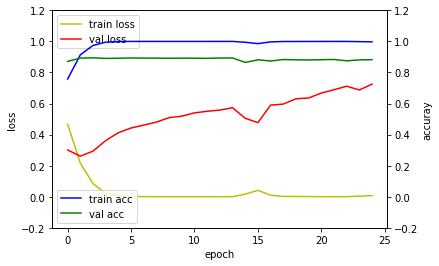

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

<h3> ->훈련과 검증 손실 분석</h3>
훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가합니다. 경사 하강법 최적화를 사용했을때 반복마다 최소화되는 것이 손실이므로 기대했던 예상입니다.3번째 순간부터 train loss보다 val loss가 역전하면서 급격하게 상승합니다. 즉, 이 말은 처음 보는 데이터에게는 잘 작동하지 않는 다는 것을 의미합니다. 이또한, LSTM과 비슷하게  <b>Overfitting</b>되었다고 하는데, 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습했다고 볼 수 있습니다. 하지만, LSTM이 급격하게 val loss가 증가한것과 달리 조금은 완만하게 val loss가 증가했기 때문에 정확도가 조금 더 높았습니다.

In [14]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 59s 2ms/step
## evaluation loss and_metrics ##
[0.8023144704818725, 0.86312]


<h3>최종 정확도 : 86.3% </h3>